### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

1. FT de la planta Gp(s):
<TransferFunction>: sys[153]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5
----------------------------------------
2. FT de lazo cerrado G_LC(s):
<TransferFunction>: sys[155]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
----------------------------------------
3. Polos de G_LC(s):
[-3.+1.j -3.-1.j]
----------------------------------------


c:\Users\janto\OneDrive\Documentos\ccontrol\control-clasico\.venv\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


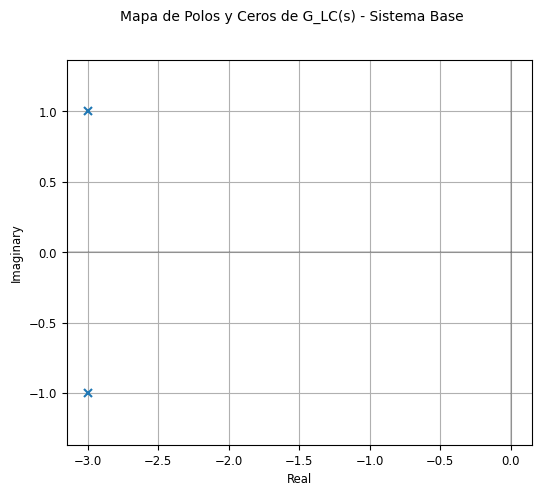

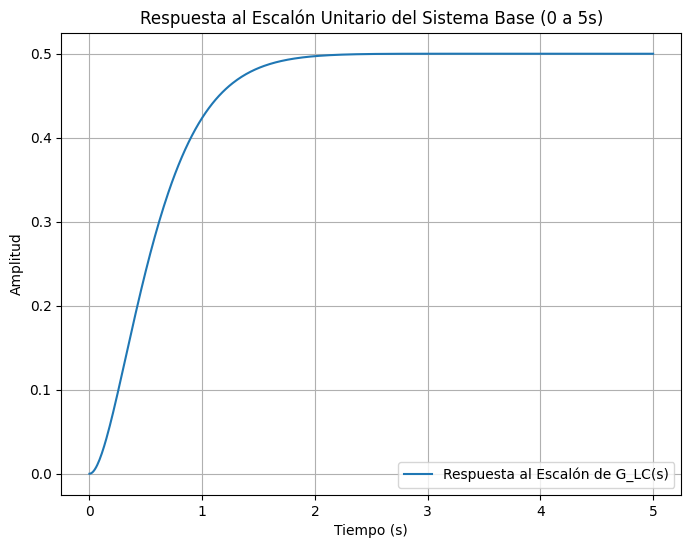

Métricas de desempeño de GLC(s):
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [26]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

num_Gp = [5]
den_Gp = [1, 6, 5]
Gp = ct.tf(num_Gp, den_Gp)
print("1. FT de la planta Gp(s):")
print(Gp)
print("-" * 40)


GLC = ct.feedback(Gp, 1)
print("2. FT de lazo cerrado G_LC(s):")
print(GLC)
print("-" * 40)

polos_GLC = ct.poles(GLC)
print("3. Polos de G_LC(s):")
print(polos_GLC)
print("-" * 40)
plt.figure(figsize=(6, 5))
ct.pzmap(GLC, plot=True, title='Mapa de Polos y Ceros de G_LC(s) - Sistema Base')
plt.grid(True)
plt.show(block=False) 


t = np.linspace(0, 5, 501)
t, y_out = ct.step_response(GLC, T=t)

plt.figure(figsize=(8, 6))
plt.plot(t, y_out, label='Respuesta al Escalón de G_LC(s)')
plt.title('Respuesta al Escalón Unitario del Sistema Base (0 a 5s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show(block=False) 

print("Métricas de desempeño de GLC(s):")
info = ct.step_info(GLC)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_out[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

plt.show()



### Razonamiento de Sintonía.


$K_p$ (Proporcional): Reduce el error en estado estacionario, incrementa la velocidad de respuesta, pero puede aumentar el sobreimpulso. Se ajustará para aumentar la velocidad y reducir el sobreimpulso (junto con $K_d$).



$K_i$ (Integral): Elimina el $e_{ss}$ para entradas escalón, pero puede desestabilizar o aumentar el sobreimpulso. Se debe usar un $K_i > 0$ para cumplir con el requisito de $e_{ss}$ = 0.


$K_d$ (Derivativo): Aumenta el amortiguamiento, reduce el sobreimpulso y mejora la estabilidad. Se usará para reducir el sobreimpulso a menos del $5\%$ y ayudar a reducir el tiempo de establecimiento.

**Eliminar el Error en Estado Estacionario ($e_{ss}=0$):**

* **Acción: Se requiere $K_i > 0$ (Acción Integral):** El término $\frac{K_i}{s}$ introduce un polo en el origen en el lazo abierto, lo cual garantiza $e_{ss}=0$ para una entrada escalón. 

* **Selección Inicial: $K_i = 18$.**

**Reducir el Tiempo de Establecimiento (< 1.0 s):**

* **Acción: Se requiere $K_p > 0$ (Acción Proporcional):** $K_p$ es el factor principal para aumentar la velocidad de respuesta, pero también incrementa el sobreimpulso. Debe ser sintonizado junto con $K_d$. Se inicia con un $K_p$ que acelera la respuesta sin sobrecargar el sistema ($K_p=10$) y se aumenta progresivamente hasta que $T_s$ cumpla, mientras $K_d$ lo mantiene amortiguado. 

* **Selección Inicial: $K_p = 18$.**

**Reducir el Sobreimpulso (< 5\%$):**

* **Acción: Se requiere $K_d > 0$ (Acción Derivativa):** El $K_d$ actúa como un "freno", introduciendo un cero en lazo abierto que "jala" el lugar de las raíces hacia el semiplano izquierdo, aumentando el amortiguamiento. 

* **Selección Inicial:** Un valor grande para $K_d$ es necesario para contrarrestar el alto sobreimpulso del sistema y la desestabilización que introduce el término integral. Probaremos con $K_d = 2.5$.

1. y 2. FT del Controlador PID:
Ganancias elegidas: Kp=18.0, Ki=18.0, Kd=2.5
<TransferFunction>: sys[222]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  2.5 s^2 + 18 s + 18
  -------------------
           s
----------------------------------------
3. Nueva FT de lazo cerrado G_LC_PID(s):
<TransferFunction>: sys[225]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     12.5 s^2 + 90 s + 90
  --------------------------
  s^3 + 18.5 s^2 + 95 s + 90
----------------------------------------
Polos de G_LC_PID(s):
[-9.48223507+0.j -7.80108355+0.j -1.21668138+0.j]
----------------------------------------


c:\Users\janto\OneDrive\Documentos\ccontrol\control-clasico\.venv\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


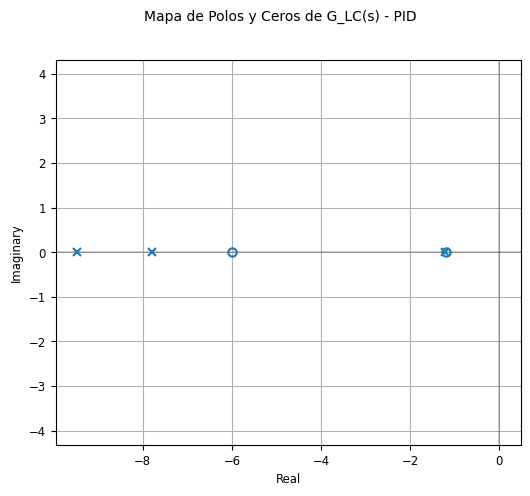

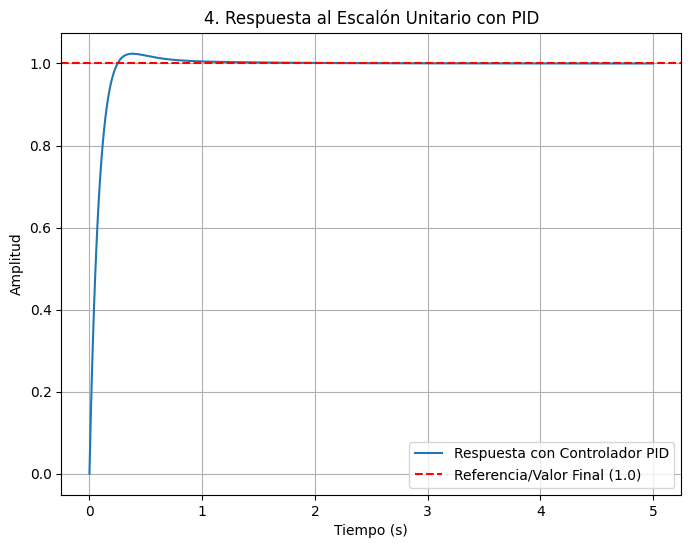

Métricas de desempeño de GLC(s):
  - Sobreimpulso: 2.38%
  - Tiempo de establecimiento: 0.49 s
  - Valor final: 1.0000
  - Error en estado estacionario: -0.0000


In [36]:

Kp = 18.0
Ki = 18.0
Kd = 2.5

num_Gc = [Kd, Kp, Ki]
den_Gc = [1, 0] 
Gc = ct.tf(num_Gc, den_Gc)

print("1. y 2. FT del Controlador PID:")
print(f"Ganancias elegidas: Kp={Kp}, Ki={Ki}, Kd={Kd}")
print(Gc)
print("-" * 40)

GLC_PID = ct.feedback(Gc * Gp, 1)
print("3. Nueva FT de lazo cerrado G_LC_PID(s):")
print(GLC_PID)
print("-" * 40)


polos_PID = ct.poles(GLC_PID)
print("Polos de G_LC_PID(s):")
print(polos_PID)
print("-" * 40)
plt.figure(figsize=(6, 5))
ct.pzmap(GLC_PID, plot=True, title='Mapa de Polos y Ceros de G_LC(s) - PID')
plt.grid(True)
plt.show(block=False)

t = np.linspace(0, 5, 501)
t, y_out_pid = ct.step_response(GLC_PID, T=t)

plt.figure(figsize=(8, 6))
plt.plot(t, y_out_pid, label='Respuesta con Controlador PID')
plt.title('4. Respuesta al Escalón Unitario con PID')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(y=1.0, color='r', linestyle='--', label='Referencia/Valor Final (1.0)')
plt.legend()
plt.grid(True)
plt.show(block=False) 


print("Métricas de desempeño de GLC(s):")
info = ct.step_info(GLC_PID)
print(f"  - Sobreimpulso: {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento: {info['SettlingTime']:.2f} s")
valor_final = y_out_pid[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario: {1 - valor_final:.4f}")

plt.show()